# Moran Processes

The evolutionary models discussed in the previous chapters assume an infinite population that can be divided in to infinitessimal parts. Finite populations can also be studied using a model called a Moran Process (first described in 1958).

---

## Moran process with neutral drift

[Video](https://youtu.be/OeMku85hwEc?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

Consider a population of two types of fixed size $N$. This can be represented as a vector of the form: $(i, N-i)$ where $i\geq 0$ represents the number of individuals of the first type.

The term **neutral** drift refers to the fact that the two types reproduce at the same rate.

The Moran process is as follows:

- At a given time step: select a random individual for reproduction and a random individual for elimination
- The eliminated individual is replaced by a new individual of the same type as the individual chosen for reproduction.
- Proceed to the next time step.
- The process terminates when there is only one type of individual in the population.

---

Here is some simple Python code that simulates such a Process assuming an initial population of $(3, 3)$:

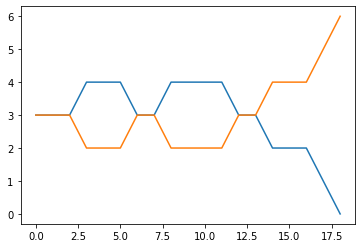

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def neutral_moran(N, i=1, seed=0):
    """
    Return the population counts for the Moran process with neutral drift.
    """

    population = [0 for _ in range(i)] + [1 for _ in range(N - i)]
    counts = [(population.count(0), population.count(1))]
    np.random.seed(seed)
    while len(set(population)) == 2:
        reproduce_index = np.random.randint(N)
        eliminate_index = np.random.randint(N)
        population[eliminate_index] = population[reproduce_index]
        counts.append((population.count(0), population.count(1)))
    return counts
    
N = 6
plt.plot(neutral_moran(N=N, i=3, seed=6));

For different seeds we see we obtain different results. What becomes of interest is not the path but the end result: which strategy overcomes the presence of the other?

In [2]:
def neutral_fixation(N, i=None, repetitions=10):
    """
    Repeat the neutral Moran process and calculate the fixation probability
    """
    fixation_count = 0
    for seed in range(repetitions):
        final_counts = neutral_moran(N=N, i=i, seed=seed)
        if final_counts[-1][0] > 0:
            fixation_count += 1 

    return  fixation_count / repetitions 

Let us take a look at probability of the first strategy taking over for different starting populations:

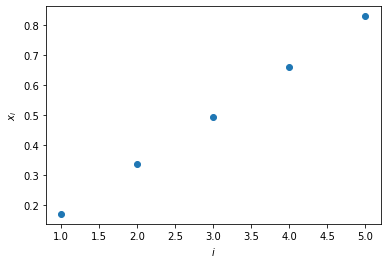

In [3]:
probabilities = [neutral_fixation(N, i=i, repetitions=500) for i in range(1, N)]
plt.scatter(range(1, N), probabilities)
plt.xlabel("$i$")
plt.ylabel("$x_i$");

We see that as the initial population starts with more of a given type, the chance that that type "takes over" (becomes fixed) grows.

This Moran Process is a specific case of a Markov Process:

- A given state of the system can be described by a single integer $0\leq i\leq N$;
- The state to state transition probabilities are given by:

  $$
  \begin{aligned}
  p_{i, i-1}&=\frac{i(N - i)}{N^2}\\
  p_{i, i+1}&=\frac{i(N - i)}{N^2}\\
  p_{i, i}&=1 - p_{i, i-1} - p_{i, i+1}
  \end{aligned}
  $$
  
  We also have two absorbing states (when the Moran process ends):
  
  $$p_{00}=1\qquad p_{0i}=0\text{ for all }i>0$$
  
  $$
  p_{NN}=1\qquad p_{Ni}=0\text{ for all } N>i
  $$
  
  these transitions can be represented as a matrix. Here for example is the matrix for $N=6$:

In [4]:
N = 6
p = np.zeros((N + 1, N + 1))
p[0, 0] = 1
p[N, N] = 1
for i in range(1, N):
    for j in [i - 1, i + 1]:
        p[i, j] = i * (N - i) / (N ** 2)
    p[i, i] = 1 - sum(p[i, :])
p.round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.14, 0.72, 0.14, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.22, 0.56, 0.22, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.5 , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.22, 0.56, 0.22, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.14, 0.72, 0.14],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

The above corresponds to a particular type of Markov process called a Birth-Death process

---

## Birth death process

[Video](https://youtu.be/zJQQF2tq9AA?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

A birth death process is a Markov process with the following properties:

- $p_{i,i+1}+p_{i,i-1}\leq 1$
- $p_{ii}=1-p_{i,i+1}-p_{i,i-1}$
- $p_{00}=1$ and $p_{NN}=1$

---

Thus we have two absorbing states: $\{0, N\}$. Let us denote by $x_i$ the probability of being in $state$ $i$ and eventually reaching state $N$. 

We have the following linear system:

\begin{align}
    x_0&=0\\
    x_i&=p_{i,i-1}x_{i-1}+p_{ii}x_i+p_{i,i+1}x_{i+1}\text{ for all }0< i< N-1\\
    x_N&=1\\
\end{align}

---

## Theorem: Fixation probabilities for the birth death process

Given a birth death process as defined above, the fixation probability $x_i$ is given by:

$$x_i=\frac{1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k}{1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k}$$

where:

$$
\gamma_k = \frac{p_{k,k-1}}{p_{k,k+1}}
$$

### Proof

We have:

$$
\begin{aligned}
    p_{i,i+1}x_{i+1} & = -p_{i,i-1}x_{i-1} + x_i(1 - p_{ii}) \\ 
    p_{i,i+1}x_{i+1} & = p_{i,i-1}(x_{i} - x_{i-1}) + x_ip_{i,i+1} \\ 
    x_{i+1} - x_i    & = \frac{p_{i, i-1}}{p_{i, i+1}}(x_i-x_{i-1})=\gamma_i(x_i-x_{i-1})
\end{aligned}
$$

We observe that:

$$
\begin{aligned}
    x_2 - x_1 &= \gamma_1(x_1-x_{0})=\gamma_1x_1\\
    x_3 - x_2 &= \gamma_2(x_2-x_1)=\gamma_2\gamma_1x_1\\
    x_4 - x_3 &= \gamma_3(x_3-x_2)=\gamma_3\gamma_2\gamma_1x_1\\
              &\; \vdots & \\
    x_{i+1} - x_i &= \gamma_i(x_i-x_{i-1})=\prod_{k=1}^i\gamma_kx_1\\
               &\; \vdots & \\   
    x_{N} - x_{N-1} &= \gamma_{N-1}(x_{N-1}-x_{N-2})=\prod_{k=1}^{N-1}\gamma_kx_1\\
\end{aligned}
$$

thus we have:

$$x_i=\sum_{j=0}^{i-1}x_{j+1}-x_j=\left(1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k\right)x_1$$

we complete the proof by solving the following equation to obtain $x_1$:

$$x_N=1=\left(1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k\right)x_1$$

---

In the case of neutral drift (considered above) we have:

$$p_{i,i-1}=p_{i,i+1}$$

thus:

$$
\gamma_i=1
$$

so:

$$
x_i=\frac{1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k}{1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k}=\frac{1+i-1}{1+N-1}=\frac{i}{N}
$$

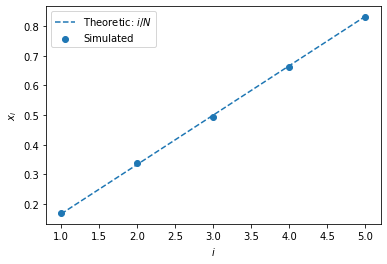

In [5]:
probabilities = [neutral_fixation(N, i=i, repetitions=500) for i in range(1, N)]
plt.scatter(range(1, N), probabilities, label="Simulated")
plt.plot(range(1, N), [i / N for i in range(1, N)], label="Theoretic: $i/N$", linestyle="dashed")
plt.xlabel("$i$")
plt.ylabel("$x_i$")
plt.legend();

---

## Fixation probability

The fixation probability in a Moran process is the probability that a give type starting with $i=1$ individuals takes over an entire population. We denote the fixation probabilities of the first/second type as $\rho_1$ and $\rho_2$ respectively and we have:

$$
\rho_1=x_1
$$

$$
\rho_2=1-x_{N-1}
$$

---

We will now consider a Moran process on a game:

---

## Moran process on a game

[Video](https://www.youtube.com/watch?v=TpqVoF1fBF8&index=43&list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)


Consider a matrix $A\in\mathbb{R}^{m\times n}$ representing a game with two strategies. 

$$
A=
\begin{pmatrix}
    a & b\\
    c & d
\end{pmatrix}
$$

The Moran process is as follows:

- At a given time step: all individuals play all other individuals.
- Obtain their fitness as given by the game.
- Randomly select an individual proportional to their fitness as an individual to be reproduced
- Uniformly select an individual to be replaced
- Proceed to the next time step.
- The process terminates when there is only one type of individual in the population.


Assuming $i$ individuals of the first type, the fitness of both types is given respectively by:

$$f_{1i}=\frac{a(i-1)+b(N-i)}{N-1}$$
$$f_{2i}=\frac{c(i)+d(N-i-1)}{N-1}$$

The transition probabilities are then given by:

$$p_{i,i+1}=\frac{if_{1i}}{if_{1i} + (N-i)f_{2i}}\frac{N-i}{N}$$
$$p_{i,i-1}=\frac{(N-i)f_{2i}}{if_{1i} + (N-i)f_{2i}}\frac{i}{N}$$

which gives:

$$\gamma_i=\frac{f_{2i}}{f_{1i}}$$

thus:

$$
x_i=\frac{1+\sum_{j=1}^{i-1}\prod_{k=1}^j\gamma_k}{1+\sum_{j=1}^{N-1}\prod_{k=1}^j\gamma_k}
$$

---

Here is some code to carry out this calculation:

In [6]:
def theoretic_fixation(N, game, i=1):
    """
    Calculate x_i as given by the above formula
    """
    f_ones = np.array([(game[0, 0] * (i - 1) + game[0, 1] * (N - i)) / (N - 1) for i in range(1, N)])
    f_twos = np.array([(game[1, 0] * i + game[1, 1] * (N - i - 1)) / (N - 1) for i in range(1, N)])
    gammas = f_twos / f_ones
    return (1 + np.sum(np.cumprod(gammas[:i-1]))) / (1 + np.sum(np.cumprod(gammas)))

Here is an example of calculating $x_1$ for the following game for $N=4$:

[Video](https://www.youtube.com/watch?v=3sBVrnQhemE&index=44&list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

$$
A = 
\begin{pmatrix}
    4 & 1\\
    1 & 4
\end{pmatrix}
$$

In [7]:
A = np.array([[4, 1], 
              [1, 4]])
theoretic_fixation(N=4, i=1, game=A)

0.125

Applying the theorem gives:

$$
\begin{aligned}
f_{1i}&=\frac{4(i - 1) + 4 - i}{3} = \frac{4i-4+4-i}{3}=i\\
f_{2i}&=\frac{i + 4(3 - i)}{3} = \frac{12-3i}{3}=4-i
\end{aligned}
$$

$$
\gamma_i = \frac{f_{2i}}{f_{1i}}=\frac{4-i}{i}=\frac{4}{i}-1
$$

Thus:

$$
\begin{aligned}
x_1 & =\frac{1 + \sum_{j=1}^{0}\prod_{k=1}^{j}\gamma_k}{1 + \sum_{j=1}^{4 - 1}\prod_{k=1}^{j}\gamma_k}\\  
    & =\frac{1}{1 + \sum_{j=1}^{3}\prod_{k=1}^{j}\gamma_k}\\ 
    & =\frac{1}{1 + \gamma_1 + \gamma_1\times \gamma_2 + \gamma_1 \times \gamma_2 \times \gamma_3}\\ 
    & =\frac{1}{1+3+3\times 1 + 3 \times 1\times \frac{1}{3}} = \frac{1}{1 + 3 + 3 + 1}=\frac{1}{8}\\
\end{aligned}
$$

Nashpy has the ability to run a single Moran process:

In [8]:
import nashpy as nash

game = nash.Game(A)
initial_population = np.array((0, 1, 1, 1))
np.random.seed(0)
generations = game.moran_process(
    initial_population=initial_population
)
for population in generations:
    print(population)

[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[1 1 1 1]


We see there that in a population of 4 individuals, a single individual of the first type (`0`) does not become fixed. That is just for a single run, to be able to approximate the fixation probability the process needs to be repeated, this can be done in Nashpy:

In [9]:
import collections


def approximate_fixation(N, A, i=None, repetitions=10):
    """
    Repeat the Moran process and calculate the fixation probability
    
    This is done by carrying out the following steps:
    
    1. Creating a game
    2. Building an initial population with i individuals 
       of the first type
    3. Getting the fixation probabilities of both types
    4. Returning the probability of the first type
    """
    game = nash.Game(A)
    initial_population = i * [0] + (N - i) * [1]
    probabilities = game.fixation_probabilities(
        initial_population=initial_population, 
        repetitions=repetitions
    )
    
    return probabilities[0]

Here is how the fixation probabilities vary for different initial populations:

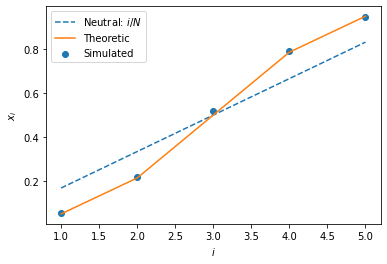

In [10]:
probabilities = [approximate_fixation(N, i=i, A=A, repetitions=500) for i in range(1, N)]
plt.scatter(range(1, N), probabilities, label="Simulated")
plt.plot(range(1, N), [i / N for i in range(1, N)], label="Neutral: $i/N$", linestyle="dashed")
plt.plot(range(1, N), [theoretic_fixation(N=N, i=i, game=A) for i in range(1, N)], label="Theoretic")
plt.xlabel("$i$")
plt.ylabel("$x_i$")
plt.legend();